In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Functions

In [10]:
def create_graph(file_path):
    '''
    Reads file with an edgelist and creates NetworkX graph from it.

    Parameters:
        file_path (str): Path to the file containing the edge list.

    Returns:
        G (networkx.Graph): Graph created from the edgelist.
    '''
    G = nx.Graph() # Create an empty graph object
    with open(file_path, 'r') as file: # Open the file containing the edgelist
        for line in file:
            node1, node2 = line.strip().split('\t') # Split ech line by the tab into two nodes
            G.add_edge(node1, node2) # Add edges to the graph
    return G

In [11]:
def compute_shortest_paths(graph, nodes):
    """
    Compute the shortest paths between pairs of nodes in a given graph.
    
    Parameters:
        graph (networkx.Graph): The graph in which shortest paths are computed.
        nodes (list): List of nodes for which pairwise shortest paths are calculated.
    
    Returns:
        dict: A nested dictionary where `shortest_path_dict[source][target]` gives
              the shortest path length from `source` to `target`.
    """
        
    shortest_path_dict = {}
    for source in nodes: # Iterate through all source nodes
        path_lengths = {}
        for target in nodes: # Iterate through all targets belonging to a source
            if source != target:
                length = nx.shortest_path_length(graph, source=source, target=target) # Calcualte the shortest path between source and target
                path_lengths[target] = length # Add distance to the dictionary containing the lenghts to each target for a source
        shortest_path_dict[source] = path_lengths # Add dictionary to dictionary containing all distance dicitoanries for every source node
    return shortest_path_dict

In [12]:
def format_shortest_path_dict(shortest_path_dict):
    """
    Format the shortest path dictionary for plotting by creating unique key pairs.
    
    Parameters:
        shortest_path_dict (dict): Nested dictionary with shortest path lengths.
    
    Returns:
        dict: A dictionary where each key is a formatted string "node1 - node2"
              representing the path, and the value is the shortest path length.
    """
        
    formatted_dict  = {}
    for source in shortest_path_dict:
        for target in shortest_path_dict[source]:
            path_key = f'{source} - {target}'
            if f'{target} - {source}' not in formatted_dict.keys(): # Avoid duplicate entries by checking if reverse has been added
                formatted_dict[path_key] = shortest_path_dict[source][target] # Add previously calculated distance between nodes to the formatted dictionary

    return formatted_dict

In [44]:
def shortest_path_distance_plot(x_dict, y_dict, x_title = None, y_title = None, plot_title = None, save_path = None, cbar = None):
    """
    Create a scatter plot of data points with colors and size representing point frequency.
    
    Parameters:
        x_dict (dict): Dictionary of x-axis values with each key representing a point label.
        y_dict (dict): Dictionary of y-axis values with each key representing a point label.
        x_label (str, optional): Label for the x-axis.
        y_label (str, optional): Label for the y-axis.
        plot_title (str, optional): Title of the plot.
        save_path (str, optional): File path to save the plot as a PDF.
        color_bar (bool): If True, display a color bar to indicate frequency of points.
    """

    # Count frequency of each (x,y) pair
    point_counts = {}
    common_keys = set(x_dict.keys()).intersection(y_dict.keys()) # Get keys shared by both dicitionaries
    for key in common_keys:
        x = x_dict[key] # get distance for a given key (node pair)
        y = y_dict[key]
        point_counts[(x, y)] = point_counts.get((x, y), 0) + 1 # Returns the current value of the dict, or if the key does not exist 0, +1 is then added for the count at this point
    
    # Separate the unique points and their counts
    points, counts = zip(*point_counts.items())
    x, y = zip(*points)
    
    # Scale points according to their frequency
    sizes = [count * 0.25 for count in counts]
    colors = counts

    # Create scatter plot with color gradient based on poitn frequency
    plt.figure(figsize=(6.7, 4))
    scatter = plt.scatter(x, y, s=sizes, c=colors, cmap='magma', alpha=0.7)

    # If specified, add color bar
    if cbar:
        cbar = plt.colorbar(scatter) 
        # Set color bar label and tick font size
        cbar.set_label('Counts', fontsize=20)
        cbar.ax.tick_params(labelsize=20)
    
    #Set plot labels, title and appearance
    plt.xlabel(x_title, fontsize = 20)
    plt.ylabel(y_title, fontsize = 20)
    plt.title(plot_title)
    plt.grid(False)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)

    # If specified, save plot as PDF
    if save_path:
        plt.tight_layout()
        plt.savefig(save_path, format='pdf', bbox_inches = 'tight')
    
    plt.show() 

# Analysis

In [14]:
# Load the graphs of the three disease multiplex layers

genetic_layer_path = f'../00_Data/Sparsified_networks/disease_on_genes.tsv'
genetic_layer_graph = create_graph(genetic_layer_path)

symptomatic_layer_path = f'../00_Data/Sparsified_networks/disease_on_symptoms.tsv'
symptomatic_layer_graph = create_graph(symptomatic_layer_path)

drug_layer_path = f'../00_Data/Sparsified_networks/disease_on_drugs.tsv'
drug_layer_graph = create_graph(drug_layer_path)


In [23]:
# Get the subset of nodes that are present in all layers, by getting the intersection of all three node sets
nodes = list(set(genetic_layer_graph.nodes()).intersection(set(symptomatic_layer_graph)).intersection(set(drug_layer_graph)))
print(len(nodes))

291


In [27]:
# Get dictionaires of shortest path lengths for the three disease multiplex layers
shortest_paths_genetic_layer = compute_shortest_paths(genetic_layer_graph, nodes)
shortest_paths_symptomatic_layer = compute_shortest_paths(symptomatic_layer_graph, nodes)
shortest_paths_drug_layer = compute_shortest_paths(drug_layer_graph, nodes)

In [28]:
# Format the shortest path length dictionaries
formatted_shortest_paths_genetic_layer = format_shortest_path_dict(shortest_paths_genetic_layer)
formatted_shortest_paths_symptomatic_layer = format_shortest_path_dict(shortest_paths_symptomatic_layer)
formatted_shortest_paths_drug_layer = format_shortest_path_dict(shortest_paths_drug_layer)

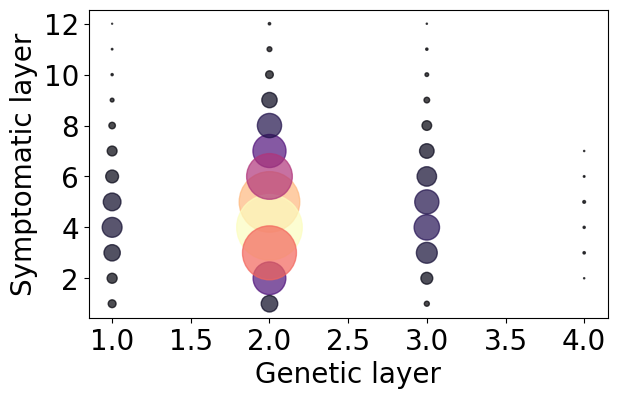

In [46]:
# Plot the genetic - symptomatic layer figure
shortest_path_distance_plot(
    formatted_shortest_paths_genetic_layer,
    formatted_shortest_paths_symptomatic_layer,
    x_title = 'Genetic layer',
    y_title = 'Symptomatic layer'
    )

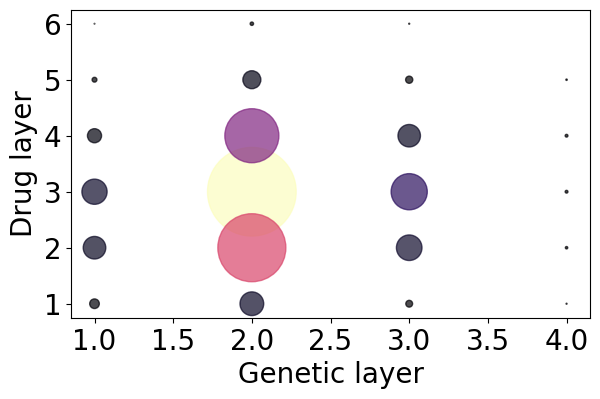

In [47]:
# Plot the genetic - drug layer figure
shortest_path_distance_plot(
    formatted_shortest_paths_genetic_layer,
    formatted_shortest_paths_drug_layer,
    x_title = 'Genetic layer',
    y_title = 'Drug layer'
    )

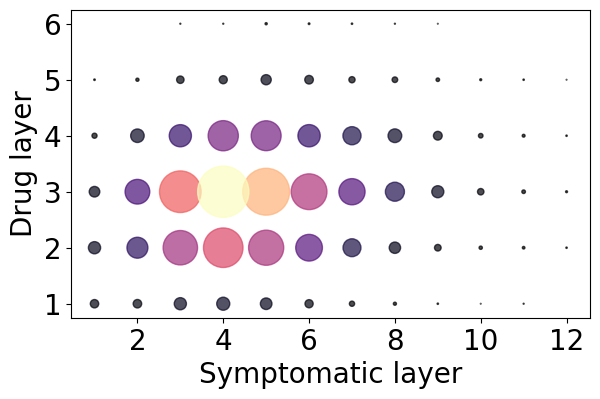

In [48]:
# Plot the genetic - drug layer figure
shortest_path_distance_plot(
    formatted_shortest_paths_symptomatic_layer,
    formatted_shortest_paths_drug_layer,
    x_title = 'Symptomatic layer',
    y_title = 'Drug layer'
    )